In [22]:
import methods
import dgp
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import textwrap
import importlib
import tqdm
import os
os.chdir('/Users/harshparikh/Documents/GitHub/credence-to-causal-estimation/credence-v2/src/')
importlib.reload(methods)
importlib.reload(dgp)
os.chdir('/Users/harshparikh/Documents/GitHub/credence-to-causal-estimation/credence-v2/notebooks/')
import warnings
warnings.filterwarnings("ignore")
sns.set(style="whitegrid",font_scale=1.5)

In [23]:
df_exp_lalonde, df_obs_lalonde = dgp.lalonde()
df_exp_star, df_obs_star = dgp.project_star()

In [24]:
print(df_exp_lalonde.groupby(by='treat').mean().round(decimals=2).to_latex())
print(df_obs_lalonde.groupby(by='treat').mean().round(decimals=2).to_latex())

\begin{tabular}{lrrrrrrrr}
\toprule
{} &    age &  education &  black &  hispanic &  married &  nodegree &         re75 &         re78 \\
treat &        &            &        &           &          &           &              &              \\
\midrule
0     &  24.45 &      10.19 &    0.8 &      0.11 &     0.16 &      0.81 &  3026.679932 &  5090.049805 \\
1     &  24.63 &      10.38 &    0.8 &      0.09 &     0.17 &      0.73 &  3066.100098 &  5976.350098 \\
\bottomrule
\end{tabular}

\begin{tabular}{lrrrrrrrr}
\toprule
{} &        age &  education &  black &  hispanic &  married &  nodegree &         re75 &         re78 \\
treat &            &            &        &           &          &           &              &              \\
\midrule
0.0   &  28.790001 &      10.40 &   0.65 &      0.10 &     0.37 &      0.69 &  4721.759766 &  6920.720215 \\
1.0   &  24.629999 &      10.38 &   0.80 &      0.09 &     0.17 &      0.73 &  3066.100098 &  5976.350098 \\
\bottomrule
\end{tabular}



In [30]:
ate_exp_lalonde = df_exp_lalonde.loc[df_exp_lalonde['treat']==1,'re78'].mean() - df_exp_lalonde.loc[df_exp_lalonde['treat']==0,'re78'].mean()
ate_lalonde = methods.bootstrap_ate_inference(outcome='re78',treatment='treat',data=df_exp_lalonde,repeats=10)

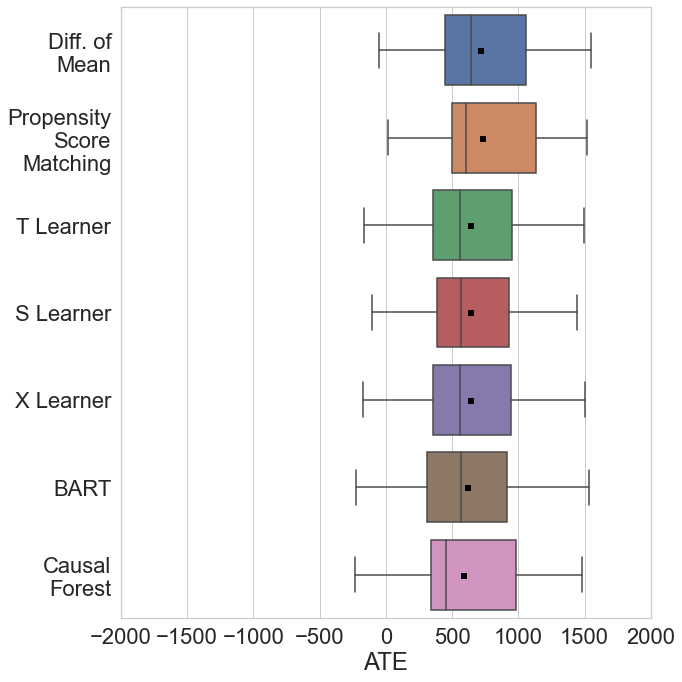

In [31]:
order = ['Diff. of Mean','Propensity Score Matching','Linear T Learner', 'Linear S Learner',
         'Linear X Learner', 'Causal BART', 'Causal Forest']

order_2 = ['Diff. of Mean','Propensity Score Matching','T Learner', 'S Learner',
         'X Learner', 'BART', 'Causal Forest']

width, height = 10, 10
sns.set(style="whitegrid",font_scale=2)
# order = list(np.abs(bias_1.mean(axis=0)).sort_values().index)
fig, ax = plt.subplots(figsize=(width, height))
sns.boxplot(data=ate_lalonde[order],orient='h',showmeans=True,
            meanprops={"marker":"s",
                       "markerfacecolor":"black", 
                       "markeredgecolor":"black",
                      "markersize":"5"},showfliers=False,ax=ax)
# sns.swarmplot(data=bias_1[order],orient='h',color='black')
plt.yticks(np.arange(0,len(order)),[textwrap.fill(e, 12) for e in order_2])
# plt.axvline(0,c='#a65111',ls='--',lw=3)
plt.xlabel('ATE')
plt.xlim((-2000,2000))
plt.tight_layout()
fig.savefig('Figures/ate_lalonde_exp.png')


In [25]:
ate_exp_lalonde = df_exp_lalonde.loc[df_exp_lalonde['treat']==1,'re78'].mean() - df_exp_lalonde.loc[df_exp_lalonde['treat']==0,'re78'].mean()
ate_lalonde = methods.bootstrap_ate_inference(outcome='re78',treatment='treat',data=df_obs_lalonde,repeats=10)

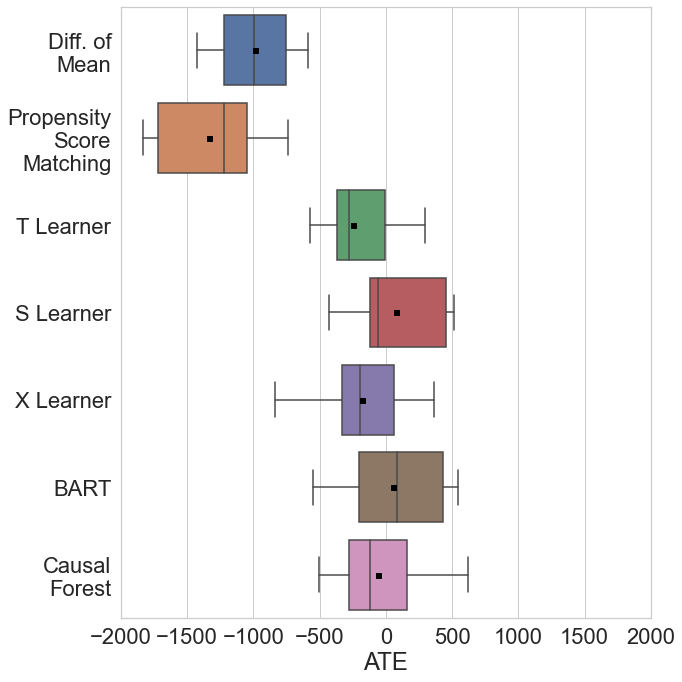

In [29]:
order = ['Diff. of Mean','Propensity Score Matching','Linear T Learner', 'Linear S Learner',
         'Linear X Learner', 'Causal BART', 'Causal Forest']

width, height = 10, 10
sns.set(style="whitegrid",font_scale=2)
# order = list(np.abs(bias_1.mean(axis=0)).sort_values().index)
fig, ax = plt.subplots(figsize=(width, height))
sns.boxplot(data=ate_lalonde[order],orient='h',showmeans=True,
            meanprops={"marker":"s",
                       "markerfacecolor":"black", 
                       "markeredgecolor":"black",
                      "markersize":"5"},showfliers=False,ax=ax)
# sns.swarmplot(data=bias_1[order],orient='h',color='black')
plt.yticks(np.arange(0,len(order)),[textwrap.fill(e, 12) for e in order_2])
# plt.axvline(0,c='#a65111',ls='--',lw=3)
plt.xlabel('ATE')
plt.xlim((-2000,2000))
plt.tight_layout()
fig.savefig('Figures/ate_lalonde_obs.png')



In [19]:
ate_exp_star = df_exp_star.loc[df_exp_star['g3smallclass']==1,'g3avgscore'].mean() - df_exp_star.loc[df_exp_star['g3smallclass']==0,'g3avgscore'].mean()
ate_star = methods.bootstrap_ate_inference(outcome='g3avgscore',treatment='g3smallclass',data=df_obs_star,repeats=10)

KeyboardInterrupt: 

In [ ]:
order = ['Diff. of Mean','Propensity Score Matching','Linear T Learner', 'Linear S Learner',
         'Linear X Learner', 'Causal BART', 'Causal Forest', 'TMLE', 'Doubly Robust (Linear)']

width, height = 20, 10
sns.set(style="whitegrid",font_scale=2)
# order = list(np.abs(bias_1.mean(axis=0)).sort_values().index)
fig, ax = plt.subplots(figsize=(width, height))
sns.boxplot(data=ate_star[order],orient='v',showmeans=True,
            meanprops={"marker":"s",
                       "markerfacecolor":"black", 
                       "markeredgecolor":"black",
                      "markersize":"5"},showfliers=False,ax=ax)
# sns.swarmplot(data=bias_1[order],orient='h',color='black')
plt.xticks(np.arange(0,len(order)),[textwrap.fill(e, 12) for e in order])
# plt.axvline(0,c='#a65111',ls='--',lw=3)
plt.xlabel('ATE')
plt.tight_layout()
fig.savefig('Figures/ate_star_exp.png')